### Import packages and library

In [ ]:
# Common imports
import numpy as np
import os, time
import pandas as pd
import sys
import sklearn

# Our new Deep Learning imports
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.optimizers import Adam

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

# make it reproducible code
np.random.seed(42)
tf.random.set_seed(42)

### Loading and initial processing of the dataset

In [1]:
microsoft_df = pd.read_csv("MSFT.csv")
microsoft_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
1,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
2,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
3,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
4,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059318,58435200
...,...,...,...,...,...,...,...
9483,2023-10-30,333.410004,339.450012,331.829987,337.309998,337.309998,22828100
9484,2023-10-31,338.850006,339.000000,334.690002,338.109985,338.109985,20265300
9485,2023-11-01,339.790009,347.420013,339.649994,346.070007,346.070007,28158800
9486,2023-11-02,347.239990,348.829987,344.769989,348.320007,348.320007,24348100


In [2]:
microsoft_df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
9478,2023-10-23,325.470001,332.730011,324.390015,329.320007,329.320007,24374700
9479,2023-10-24,331.299988,331.839996,327.600006,330.529999,330.529999,31153600
9480,2023-10-25,345.019989,346.200012,337.619995,340.670013,340.670013,55053800
9481,2023-10-26,340.540009,341.630005,326.940002,327.890015,327.890015,37828500
9482,2023-10-27,330.429993,336.720001,328.399994,329.809998,329.809998,29856500
9483,2023-10-30,333.410004,339.450012,331.829987,337.309998,337.309998,22828100
9484,2023-10-31,338.850006,339.000000,334.690002,338.109985,338.109985,20265300
9485,2023-11-01,339.790009,347.420013,339.649994,346.070007,346.070007,28158800
9486,2023-11-02,347.239990,348.829987,344.769989,348.320007,348.320007,24348100
9487,2023-11-03,349.630005,354.390015,347.329987,352.799988,352.799988,23624000


In [3]:
# Summary Stats
microsoft_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9488.000000,9488.000000,9488.000000,9488.000000,9488.000000,9.488000e+03
mean,51.652123,52.206647,51.088299,51.664912,46.230137,5.734718e+07
std,76.505392,77.292073,75.690024,76.523281,76.616447,3.684581e+07
min,0.090278,0.092014,0.089410,0.090278,0.056083,2.304000e+06
25%,5.500000,5.591797,5.421875,5.482422,3.405801,3.315208e+07
50%,27.160000,27.440001,26.940001,27.190001,19.103070,5.059745e+07
75%,45.000000,45.452500,44.529999,44.994141,35.529859,7.131498e+07
max,361.750000,366.779999,352.440002,359.489990,358.730469,7.886880e+08


In [4]:
# the stock price is not closed on everyday basis because on certain reasons:
# market hours - stock market have specific trading hours. NASDAQ have regular time hours from 9.30am to 4,00pm
# holiday weekend - no trading on weekends
# low liquidity - not popular stocks may have not active trading everyday.
# long-term investing- many investors buy stocks with a long term perspective and are not actively trading everyday
# price stability - considerable stable or "blue chip" stocks and may not experience price fluctuation. investors may holding this stocks

#Closing Price
#The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

In [8]:
# Get the date and close columns
microsoft_df = microsoft_df[["Date","Close"]]
microsoft_df

,Date,Close
0,1986-03-14,0.100694
1,1986-03-17,0.102431
2,1986-03-18,0.099826
3,1986-03-19,0.098090
4,1986-03-20,0.095486
...,...,...
9483,2023-10-30,337.309998
9484,2023-10-31,338.109985
9485,2023-11-01,346.070007
9486,2023-11-02,348.320007


In [9]:
# change the date from character to to datetime type
microsoft_df['Date'] = pd.to_datetime(microsoft_df['Date'])
print(microsoft_df)

           Date       Close
0    1986-03-14    0.100694
1    1986-03-17    0.102431
2    1986-03-18    0.099826
3    1986-03-19    0.098090
4    1986-03-20    0.095486
...         ...         ...
9483 2023-10-30  337.309998
9484 2023-10-31  338.109985
9485 2023-11-01  346.070007
9486 2023-11-02  348.320007
9487 2023-11-03  352.799988

[9488 rows x 2 columns]


C:\Users\PUTRI KHALILAH\AppData\Local\Temp\ipykernel_23848\800606144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microsoft_df['Date'] = pd.to_datetime(microsoft_df['Date'])


In [10]:
# Make the Date column as the index
microsoft_df.index = microsoft_df.pop("Date")
microsoft_df

,Close
Date,
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
1986-03-20,0.095486
...,...
2023-10-30,337.309998
2023-10-31,338.109985
2023-11-01,346.070007


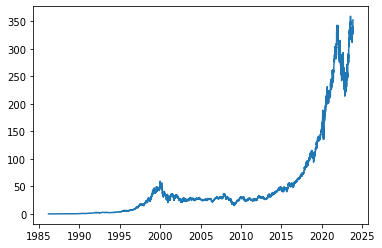

In [11]:
# plot the data based on Close price
plt.plot(microsoft_df.index,microsoft_df["Close"])
plt.show()

In [12]:
# Wec can see the data is non-stationary especially after 2015, we can see there is surged trend a bit of fluactating in the middle of 2022-2023

### Make a window time stamp of 3 days with 1986 to 2023 range of data

In [13]:
import datetime

# Window timestamp of 3 days - perhaps this can be modified to make it more predictor variables
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = pd.to_datetime(first_date_str)
  last_date  = pd.to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df_3_days = df_to_windowed_df(microsoft_df,
                                '1986-03-19',
                                '2023-11-03',
                                n=3)
windowed_df_3_days

,Target Date,Target-3,Target-2,Target-1,Target
0,1986-03-19,0.100694,0.102431,0.099826,0.098090
1,1986-03-20,0.102431,0.099826,0.098090,0.095486
2,1986-03-21,0.099826,0.098090,0.095486,0.092882
3,1986-03-24,0.098090,0.095486,0.092882,0.090278
4,1986-03-25,0.095486,0.092882,0.090278,0.092014
...,...,...,...,...,...
9480,2023-10-30,340.670013,327.890015,329.809998,337.309998
9481,2023-10-31,327.890015,329.809998,337.309998,338.109985
9482,2023-11-01,329.809998,337.309998,338.109985,346.070007
9483,2023-11-02,337.309998,338.109985,346.070007,348.320007


### Normalize the data

In [14]:
# Normalize the Close dataset since LSTM is very sensitive with outlier.
from sklearn.preprocessing import MinMaxScaler

dates = windowed_df_3_days["Target Date"]
# X = np.array(windowed_df[["Target-3", "Target-2","Target-1"]])
X = np.array(windowed_df_3_days.iloc[:,1:-1])
Y = windowed_df_3_days["Target"]

# Scale the data to the range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

n_samples, n_features = X.shape
n_time_steps = 1  # You can adjust this to your desired number of time steps

X = X.reshape(n_samples, n_features,n_time_steps)

X.shape, Y.shape, dates.shape

((9485, 3, 1), (9485,), (9485,))

### Splitting the data

In [15]:
# Split the data into training , validationa and testing sets
from sklearn.model_selection import train_test_split

X_big_train, X_test, y_big_train, y_test = train_test_split(X,Y, test_size=0.2, shuffle = False,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_big_train,y_big_train, test_size=0.25,shuffle = False,random_state=42)

print(f'Shapes are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape]}')

Shapes are [(5691, 3, 1), (5691,), (1897, 3, 1), (1897,), (1897, 3, 1), (1897,)]


In [16]:
# Split the date according to X_train, X_val and X_test size

# Calculate the corresponding indices for dates
total_samples = len(dates)
train_samples = len(X_train)
val_samples = len(X_val)
test_samples = len(X_test)

# Calculate the indices
train_indices = range(train_samples)
val_indices = range(train_samples, train_samples + val_samples)
test_indices = range(train_samples + val_samples, train_samples + val_samples + test_samples)

# Extract dates for each split
train_dates = dates[train_indices]
val_dates = dates[val_indices]
test_dates = dates[test_indices]

print(f'Shapes are {[train_dates.shape,val_dates.shape,test_dates.shape]}')

Shapes are [(5691,), (1897,), (1897,)]


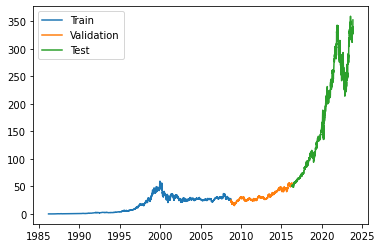

In [17]:
plt.plot(train_dates,y_train)
plt.plot(val_dates,y_val)
plt.plot(test_dates,y_test)
plt.legend(['Train', 'Validation', 'Test'])
plt.show()

### Building a Simple RNN

Epoch 1/50
178/178 [==============================] - 1s 3ms/step - loss: 314.8002 - mean_absolute_error: 13.8276 - val_loss: 294.5423 - val_mean_absolute_error: 14.7617
Epoch 2/50
178/178 [==============================] - 0s 2ms/step - loss: 114.9655 - mean_absolute_error: 9.6472 - val_loss: 69.6225 - val_mean_absolute_error: 7.3494
Epoch 3/50
178/178 [==============================] - 0s 2ms/step - loss: 4.3060 - mean_absolute_error: 1.2098 - val_loss: 1.1932 - val_mean_absolute_error: 0.7660
Epoch 4/50
178/178 [==============================] - 0s 2ms/step - loss: 0.7265 - mean_absolute_error: 0.4764 - val_loss: 0.9320 - val_mean_absolute_error: 0.6760
Epoch 5/50
178/178 [==============================] - 0s 2ms/step - loss: 0.7048 - mean_absolute_error: 0.4676 - val_loss: 1.0061 - val_mean_absolute_error: 0.7237
Epoch 6/50
178/178 [==============================] - 0s 2ms/step - loss: 0.7260 - mean_absolute_error: 0.4938 - val_loss: 0.8951 - val_mean_absolute_error: 0.6672
Epoch 7

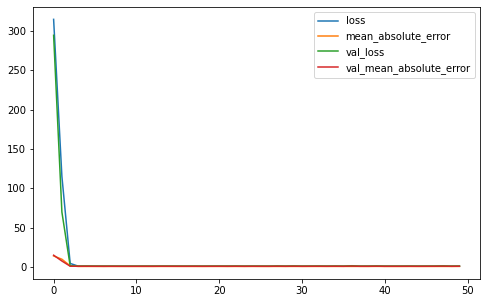

Test loss (Simple RNN): 3427.601806640625, mean absolute error (Simple RNN): 45.642826080322266


In [19]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Build the Simple RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(3, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Plot the training history
pd.DataFrame(history_rnn.history).plot(figsize=(8, 5))
plt.show()

# Evaluate the model on the test data
loss_rnn, metric_value_rnn = model_rnn.evaluate(X_test, y_test, verbose=0)
print(f"Test loss (Simple RNN): {loss_rnn}, mean absolute error (Simple RNN): {metric_value_rnn}")

60/60 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 3427.601982777083
Root Mean Squared Error (RMSE): 58.54572557221477
Mean Absolute Error (MAE): 45.64282368826961
R-squared: 0.6024390541025562


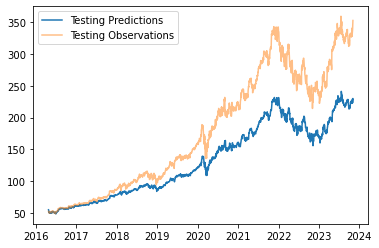

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

test_predictions = model_rnn.predict(X_test).flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test,test_predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,test_predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y_test,test_predictions)
print(f'R-squared: {r2}')

plt.plot(test_dates, test_predictions)
plt.plot(test_dates, y_test,alpha=0.5)
plt.legend(['Testing Predictions', 'Testing Observations'])

60/60 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 0.9342279657140895
Root Mean Squared Error (RMSE): 0.9665546884238313
Mean Absolute Error (MAE): 0.7023226121530488
R-squared: 0.9899777554766429


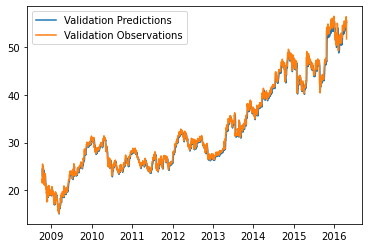

In [21]:
val_predictions = model_rnn.predict(X_val).flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_val,val_predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val,val_predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y_val,val_predictions)
print(f'R-squared: {r2}')

plt.plot(val_dates, val_predictions)
plt.plot(val_dates, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

178/178 [==============================] - 0s 876us/step
Mean Squared Error (MSE): 0.7408805143127862
Root Mean Squared Error (RMSE): 0.8607441631012006
Mean Absolute Error (MAE): 0.5409966159345038
R-squared: 0.9964369261180863


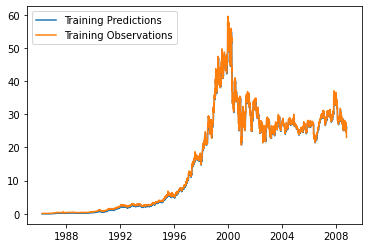

In [22]:
train_predictions = model_rnn.predict(X_train).flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train,train_predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train,train_predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y_train,train_predictions)
print(f'R-squared: {r2}')

plt.plot(train_dates, train_predictions)
plt.plot(train_dates, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

### Building  a Vanilla LSTM 

Epoch 1/50
178/178 [==============================] - 1s 3ms/step - loss: 339.0699 - mean_absolute_error: 13.9831 - val_loss: 221.9512 - val_mean_absolute_error: 12.4597
Epoch 2/50
178/178 [==============================] - 0s 2ms/step - loss: 131.7521 - mean_absolute_error: 10.5068 - val_loss: 141.4085 - val_mean_absolute_error: 10.1668
Epoch 3/50
178/178 [==============================] - 1s 3ms/step - loss: 64.5362 - mean_absolute_error: 7.2246 - val_loss: 19.8237 - val_mean_absolute_error: 3.9900
Epoch 4/50
178/178 [==============================] - 0s 2ms/step - loss: 12.3708 - mean_absolute_error: 2.9680 - val_loss: 10.3661 - val_mean_absolute_error: 2.2504
Epoch 5/50
178/178 [==============================] - 0s 2ms/step - loss: 3.6602 - mean_absolute_error: 1.4440 - val_loss: 5.8271 - val_mean_absolute_error: 1.7426
Epoch 6/50
178/178 [==============================] - 0s 2ms/step - loss: 1.8418 - mean_absolute_error: 0.9429 - val_loss: 2.4835 - val_mean_absolute_error: 1.1179


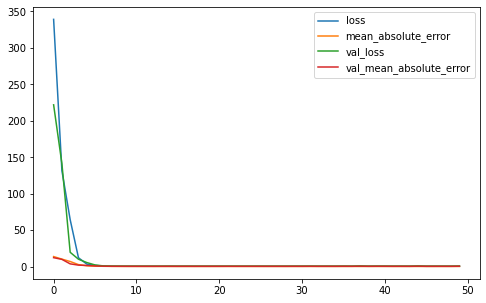

Test loss: 4438.9384765625, mean absolute error: 46.955718994140625


In [24]:
# Build the Vanilla LSTM model

model_1 = keras.Sequential()
model_1.add(layers.LSTM(50, activation='relu', input_shape=(3, 1)))
model_1.add(layers.Dense(1))
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',metrics=['mean_absolute_error'])

# Train the model
history = model_1.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Simple way to plot the history information (see later for more detail)
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.show()

# Now run the model on the test set and get results (loss and mean absolute error on the test data both reported)
# Evaluate the model on the test data
loss, metric_value = model_1.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {loss}, mean absolute error: {metric_value}")



60/60 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 4438.938398646731
Root Mean Squared Error (RMSE): 66.62535852546485
Mean Absolute Error (MAE): 46.95572506178445
R-squared: 0.4851360929845596


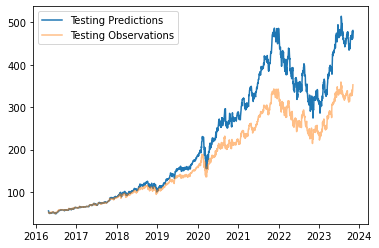

In [25]:
test_predictions = model_1.predict(X_test).flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test,test_predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,test_predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y_test,test_predictions)
print(f'R-squared: {r2}')

plt.plot(test_dates, test_predictions)
plt.plot(test_dates, y_test,alpha=0.5)
plt.legend(['Testing Predictions', 'Testing Observations'])

### Building a Stacked LSTM 

Epoch 1/50
178/178 [==============================] - 3s 6ms/step - loss: 287.2137 - mean_absolute_error: 13.2594 - val_loss: 180.3518 - val_mean_absolute_error: 11.3152
Epoch 2/50
178/178 [==============================] - 1s 4ms/step - loss: 63.4692 - mean_absolute_error: 6.7970 - val_loss: 7.0791 - val_mean_absolute_error: 2.2662
Epoch 3/50
178/178 [==============================] - 1s 4ms/step - loss: 3.3387 - mean_absolute_error: 1.3968 - val_loss: 2.7076 - val_mean_absolute_error: 1.3260
Epoch 4/50
178/178 [==============================] - 1s 5ms/step - loss: 1.1002 - mean_absolute_error: 0.7215 - val_loss: 1.0111 - val_mean_absolute_error: 0.7313
Epoch 5/50
178/178 [==============================] - 1s 3ms/step - loss: 0.7555 - mean_absolute_error: 0.5564 - val_loss: 0.9623 - val_mean_absolute_error: 0.6933
Epoch 6/50
178/178 [==============================] - 1s 4ms/step - loss: 0.6908 - mean_absolute_error: 0.5050 - val_loss: 0.8520 - val_mean_absolute_error: 0.6526
Epoch 7/5

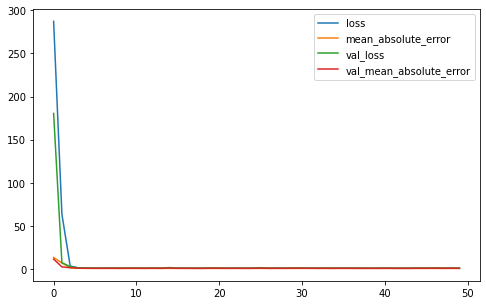

Test loss: 3659.713134765625, mean absolute error: 41.04133224487305


In [27]:
 # Build the Stacked LSTM model 3 days time stamps
model_2 = keras.Sequential()
model_2.add(layers.LSTM(50, activation='relu',return_sequences=True, input_shape=(3, 1)))
model_2.add(layers.LSTM(50, activation='relu', input_shape=(3, 1)))
model_2.add(layers.Dense(1))
model_2.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',metrics=['mean_absolute_error'])

# Train the model
history = model_2.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Simple way to plot the history information (see later for more detail)
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.show()

# Now run the model on the test set and get results (loss and mean absolute error on the test data both reported)
# Evaluate the model on the test data
loss, metric_value = model_2.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {loss}, mean absolute error: {metric_value}")

60/60 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 3659.7128474648243
Root Mean Squared Error (RMSE): 60.49556055996857
Mean Absolute Error (MAE): 41.04133076795972
R-squared: 0.5755169623947064


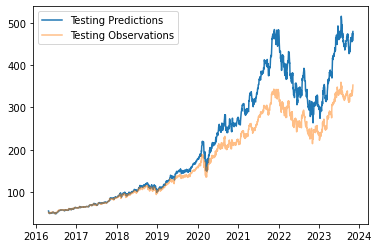

In [28]:
test_predictions = model_2.predict(X_test).flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test,test_predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,test_predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y_test,test_predictions)
print(f'R-squared: {r2}')

plt.plot(test_dates, test_predictions)
plt.plot(test_dates, y_test,alpha=0.5)
plt.legend(['Testing Predictions', 'Testing Observations'])

### Building a GRU 

Epoch 1/50
178/178 [==============================] - 2s 5ms/step - loss: 339.3445 - mean_absolute_error: 14.1944 - val_loss: 277.0318 - val_mean_absolute_error: 14.1217
Epoch 2/50
178/178 [==============================] - 1s 3ms/step - loss: 146.0595 - mean_absolute_error: 11.1090 - val_loss: 205.9038 - val_mean_absolute_error: 12.7496
Epoch 3/50
178/178 [==============================] - 0s 3ms/step - loss: 36.1688 - mean_absolute_error: 4.7407 - val_loss: 1.7153 - val_mean_absolute_error: 1.0037
Epoch 4/50
178/178 [==============================] - 1s 4ms/step - loss: 1.1597 - mean_absolute_error: 0.7761 - val_loss: 1.4782 - val_mean_absolute_error: 0.8869
Epoch 5/50
178/178 [==============================] - 1s 3ms/step - loss: 1.0164 - mean_absolute_error: 0.7118 - val_loss: 0.9705 - val_mean_absolute_error: 0.7109
Epoch 6/50
178/178 [==============================] - 0s 2ms/step - loss: 0.8660 - mean_absolute_error: 0.6364 - val_loss: 0.8712 - val_mean_absolute_error: 0.6640
Epo

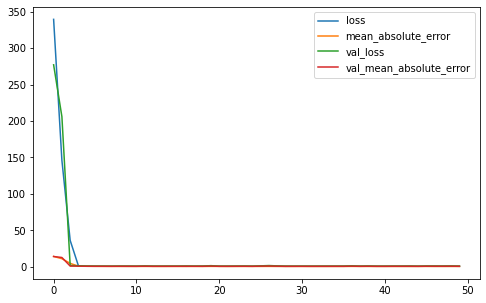

Test loss (GRU): 2028.6446533203125, mean absolute error (GRU): 33.140846252441406


In [30]:
# Build the GRU model
model_gru = keras.Sequential()
model_gru.add(layers.GRU(50, activation='relu', input_shape=(3, 1)))
model_gru.add(layers.Dense(1))
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history_gru = model_gru.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Plot the training history
pd.DataFrame(history_gru.history).plot(figsize=(8, 5))
plt.show()

# Evaluate the model on the test data
loss_gru, metric_value_gru = model_gru.evaluate(X_test, y_test, verbose=0)
print(f"Test loss (GRU): {loss_gru}, mean absolute error (GRU): {metric_value_gru}")


60/60 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 2028.6447862709613
Root Mean Squared Error (RMSE): 45.04047941875132
Mean Absolute Error (MAE): 33.14084687890908
R-squared: 0.7647014022712294


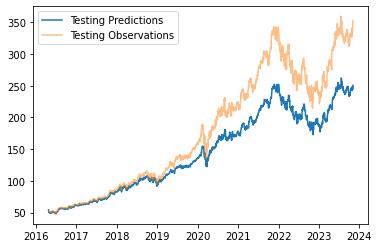

In [31]:
test_predictions = model_gru.predict(X_test).flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test,test_predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,test_predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y_test,test_predictions)
print(f'R-squared: {r2}')

plt.plot(test_dates, test_predictions)
plt.plot(test_dates, y_test,alpha=0.5)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:

# As we used the testing data, the model could not predict that good. the testing data predictions is overestimate the observation. It looks like the Vanilla LSTM Model did not
# predict well on the extrapolating. the model predict well on the value up to 50 as we can see both on training and validation. the model did not do well when on testing because the value to predict right now is above 50 hence the model did
# not learn well or understand the data. the model cannot extrapolate outside it range as in training and validation set they ha e the save range ie from 0-50 but not in testing above. hence it failed to extrapolate becauce in testing the data range it outside
# learnable range.
# we can see right here the value from 1970 until 2016, is not really helpful when predicting on testing set because there is not pattern to learn as the value in testing set started to change a lot and it was too high.

# Looking at the training and validation sets, the model appears to perform exceptionally well. The low values of MSE, RMSE, and MAE, along with a high R-squared value, suggest that the model accurately captures the patterns within the data during training and performs well on the validation set.

# However, the testing set results tell a different story. The significantly higher values for MSE, RMSE, and MAE, along with a negative R-squared value, indicate that the model struggles when extrapolating beyond the range it has learned during training and validation. The paragraph you provided explains this discrepancy by pointing out that the testing data introduces new patterns and a wider range of values that the model did not encounter during training.

# # to improve this model, perhaps we can take the timeline where it started to failed to extrapolate which is from 2019 and above. perhaps we can train and validate and testing on this range ie from 2019 onwards since it got all the pattern to learn
#

### Make a window time stamp of 3 days with 2019 to 2023 range of data

In [32]:
# Window timestamp of 3 days - perhaps this can be modified to make it more predictor variables
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = pd.to_datetime(first_date_str)
  last_date  = pd.to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2019-03-19'
windowed_df_3_days = df_to_windowed_df(microsoft_df,
                                '2019-03-19',
                                '2023-11-03',
                                n=3)
windowed_df_3_days

,Target Date,Target-3,Target-2,Target-1,Target
0,2019-03-19,114.589996,115.910004,117.570000,117.650002
1,2019-03-20,115.910004,117.570000,117.650002,117.519997
2,2019-03-21,117.570000,117.650002,117.519997,120.220001
3,2019-03-22,117.650002,117.519997,120.220001,117.050003
4,2019-03-25,117.519997,120.220001,117.050003,117.660004
...,...,...,...,...,...
1163,2023-10-30,340.670013,327.890015,329.809998,337.309998
1164,2023-10-31,327.890015,329.809998,337.309998,338.109985
1165,2023-11-01,329.809998,337.309998,338.109985,346.070007
1166,2023-11-02,337.309998,338.109985,346.070007,348.320007


In [33]:
# Normalize the Close dataset since LSTM is very sensitive with outlier.

dates = windowed_df_3_days["Target Date"]
# X = np.array(windowed_df[["Target-3", "Target-2","Target-1"]])
X = np.array(windowed_df_3_days.iloc[:,1:-1])
Y = windowed_df_3_days["Target"]

# Scale the data to the range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

n_samples, n_features = X.shape
n_time_steps = 1  # You can adjust this to your desired number of time steps

X = X.reshape(n_samples, n_features,n_time_steps)

X.shape, Y.shape, dates.shape

((1168, 3, 1), (1168,), (1168,))

In [34]:
# Split the data into training and testing sets

X_big_train, X_test, y_big_train, y_test = train_test_split(X,Y, test_size=0.2, shuffle = False)
X_train, X_val, y_train, y_val = train_test_split(X_big_train,y_big_train, test_size=0.25,shuffle = False)

print(f'Shapes are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape]}')

Shapes are [(700, 3, 1), (700,), (234, 3, 1), (234,), (234, 3, 1), (234,)]


In [35]:
# Split the date according to X_train, X_val and X_test size

# Calculate the corresponding indices for dates
total_samples = len(dates)
train_samples = len(X_train)
val_samples = len(X_val)
test_samples = len(X_test)

# Calculate the indices
train_indices = range(train_samples)
val_indices = range(train_samples, train_samples + val_samples)
test_indices = range(train_samples + val_samples, train_samples + val_samples + test_samples)

# Extract dates for each split
train_dates = dates[train_indices]
val_dates = dates[val_indices]
test_dates = dates[test_indices]

print(f'Shapes are {[train_dates.shape,val_dates.shape,test_dates.shape]}')

Shapes are [(700,), (234,), (234,)]


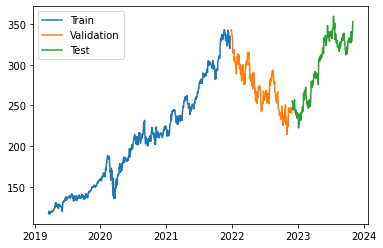

In [36]:
plt.plot(train_dates,y_train)
plt.plot(val_dates,y_val)
plt.plot(test_dates,y_test)
plt.legend(['Train', 'Validation', 'Test'])
plt.show()

Epoch 1/50
22/22 [==============================] - 0s 4ms/step - loss: 3391.5640 - mean_absolute_error: 48.5230 - val_loss: 643.9481 - val_mean_absolute_error: 21.3602
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 660.6809 - mean_absolute_error: 22.2452 - val_loss: 911.8887 - val_mean_absolute_error: 26.9038
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 289.0436 - mean_absolute_error: 14.4283 - val_loss: 223.7995 - val_mean_absolute_error: 12.0192
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 170.5014 - mean_absolute_error: 10.9702 - val_loss: 175.2865 - val_mean_absolute_error: 10.5566
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 114.1237 - mean_absolute_error: 8.9504 - val_loss: 213.8254 - val_mean_absolute_error: 11.8038
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 80.4511 - mean_absolute_error: 7.4479 - val_loss: 146.4987 - val_mean_absolute_error: 9.

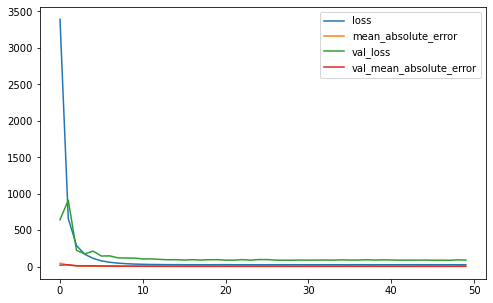

Test loss (Simple RNN): 58.37358474731445, mean absolute error (Simple RNN): 5.917091369628906
8/8 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 58.37356155875673
Root Mean Squared Error (RMSE): 7.640259259917606
Mean Absolute Error (MAE): 5.91709173718366
R-squared: 0.9588881097407392


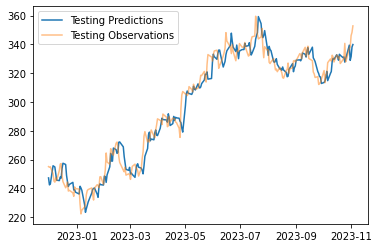

In [37]:
# Simple RNN
# Train the model
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Plot the training history
pd.DataFrame(history_rnn.history).plot(figsize=(8, 5))
plt.show()

# Evaluate the model on the test data
loss_rnn, metric_value_rnn = model_rnn.evaluate(X_test, y_test, verbose=0)
print(f"Test loss (Simple RNN): {loss_rnn}, mean absolute error (Simple RNN): {metric_value_rnn}")

test_predictions = model_rnn.predict(X_test).flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test,test_predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,test_predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y_test,test_predictions)
print(f'R-squared: {r2}')

plt.plot(test_dates, test_predictions)
plt.plot(test_dates, y_test,alpha=0.5)
plt.legend(['Testing Predictions', 'Testing Observations'])


Epoch 1/50
22/22 [==============================] - 0s 5ms/step - loss: 4248.0850 - mean_absolute_error: 56.8311 - val_loss: 1642.0322 - val_mean_absolute_error: 33.3037
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 1221.3530 - mean_absolute_error: 29.7092 - val_loss: 579.9025 - val_mean_absolute_error: 19.7182
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 292.9958 - mean_absolute_error: 13.9565 - val_loss: 187.0325 - val_mean_absolute_error: 10.8869
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 47.5044 - mean_absolute_error: 5.3012 - val_loss: 85.6843 - val_mean_absolute_error: 7.5513
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 29.4023 - mean_absolute_error: 3.9086 - val_loss: 84.9225 - val_mean_absolute_error: 7.5091
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 27.4881 - mean_absolute_error: 3.8308 - val_loss: 88.6951 - val_mean_absolute_error: 7.6143
E

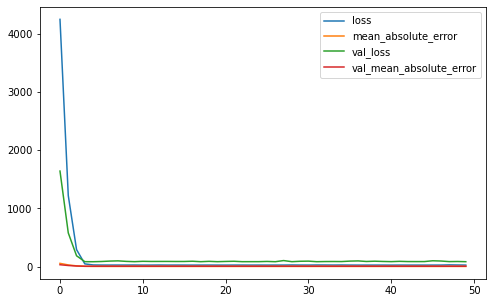

Test loss (Simple RNN): 63.51376724243164, mean absolute error (Simple RNN): 6.168429851531982
8/8 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 63.513820877928936
Root Mean Squared Error (RMSE): 7.969555877081793
Mean Absolute Error (MAE): 6.168431862037593
R-squared: 0.9552678787424775


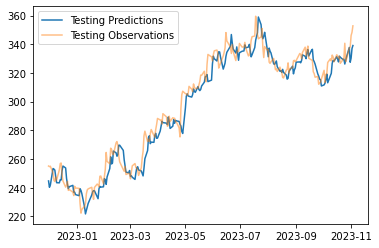

In [38]:
#Vanilla LSTM
# Train the model
history = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Plot the training history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

# Evaluate the model on the test data
loss, metric_value = model_1.evaluate(X_test, y_test, verbose=0)
print(f"Test loss (Simple RNN): {loss}, mean absolute error (Simple RNN): {metric_value}")

test_predictions = model_1.predict(X_test).flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test,test_predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,test_predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y_test,test_predictions)
print(f'R-squared: {r2}')

plt.plot(test_dates, test_predictions)
plt.plot(test_dates, y_test,alpha=0.5)
plt.legend(['Testing Predictions', 'Testing Observations'])

Epoch 1/50
22/22 [==============================] - 0s 6ms/step - loss: 2875.8687 - mean_absolute_error: 45.2833 - val_loss: 651.6542 - val_mean_absolute_error: 20.0553
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 213.5036 - mean_absolute_error: 11.2628 - val_loss: 101.9160 - val_mean_absolute_error: 8.0521
Epoch 3/50
22/22 [==============================] - 0s 5ms/step - loss: 31.0161 - mean_absolute_error: 4.2223 - val_loss: 90.1918 - val_mean_absolute_error: 7.7775
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 50.3126 - mean_absolute_error: 5.2983 - val_loss: 193.8315 - val_mean_absolute_error: 11.6998
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 55.4698 - mean_absolute_error: 5.5342 - val_loss: 121.3840 - val_mean_absolute_error: 9.0896
Epoch 6/50
22/22 [==============================] - 0s 5ms/step - loss: 34.5272 - mean_absolute_error: 4.3624 - val_loss: 85.3420 - val_mean_absolute_error: 7.5971
Epoch

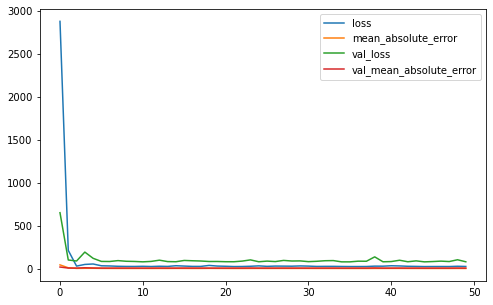

Test loss (Simple RNN): 61.91472244262695, mean absolute error (Simple RNN): 6.09721040725708
8/8 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 61.91471260551147
Root Mean Squared Error (RMSE): 7.868590255281531
Mean Absolute Error (MAE): 6.097210420101328
R-squared: 0.9563941140115407


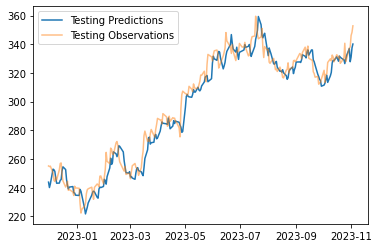

In [39]:
#Stacked LSTM
# Train the model
history = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Plot the training history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

# Evaluate the model on the test data
loss, metric_value = model_2.evaluate(X_test, y_test, verbose=0)
print(f"Test loss (Simple RNN): {loss}, mean absolute error (Simple RNN): {metric_value}")

test_predictions = model_2.predict(X_test).flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test,test_predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,test_predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y_test,test_predictions)
print(f'R-squared: {r2}')

plt.plot(test_dates, test_predictions)
plt.plot(test_dates, y_test,alpha=0.5)
plt.legend(['Testing Predictions', 'Testing Observations'])

Epoch 1/50
22/22 [==============================] - 0s 5ms/step - loss: 2425.3186 - mean_absolute_error: 39.3630 - val_loss: 138.9455 - val_mean_absolute_error: 9.5314
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 303.4456 - mean_absolute_error: 14.5658 - val_loss: 368.7881 - val_mean_absolute_error: 16.3897
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 87.0410 - mean_absolute_error: 7.5680 - val_loss: 168.3424 - val_mean_absolute_error: 10.3814
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 49.0003 - mean_absolute_error: 5.4398 - val_loss: 105.5550 - val_mean_absolute_error: 8.2247
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 37.5162 - mean_absolute_error: 4.6962 - val_loss: 98.9933 - val_mean_absolute_error: 7.9960
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 32.2448 - mean_absolute_error: 4.2821 - val_loss: 101.0669 - val_mean_absolute_error: 8.0559
Epoc

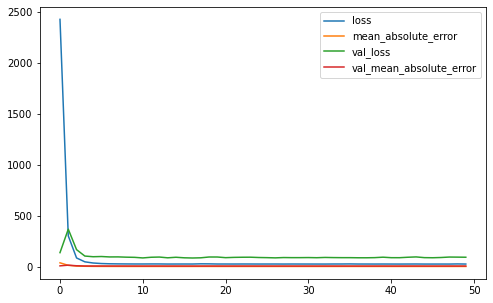

Test loss (Simple RNN): 58.924522399902344, mean absolute error (Simple RNN): 6.0252790451049805
8/8 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 58.924524058985426
Root Mean Squared Error (RMSE): 7.676231110316144
Mean Absolute Error (MAE): 6.025279347848223
R-squared: 0.958500072601296


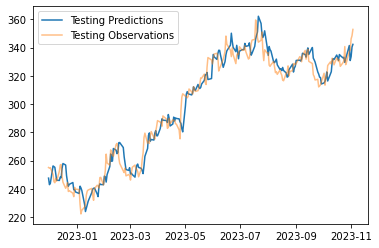

In [40]:
# GRU model
# Train the model
history = model_gru.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Plot the training history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

# Evaluate the model on the test data
loss, metric_value = model_gru.evaluate(X_test, y_test, verbose=0)
print(f"Test loss (Simple RNN): {loss}, mean absolute error (Simple RNN): {metric_value}")

test_predictions = model_gru.predict(X_test).flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test,test_predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,test_predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y_test,test_predictions)
print(f'R-squared: {r2}')

plt.plot(test_dates, test_predictions)
plt.plot(test_dates, y_test,alpha=0.5)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
# smaller time range seems doing better on the stacked LSTM model. instead change the time stamp, we only change the time stamp in term how we called ie instead passing from 1976, we passed in 2019 where the data range has many pattern to learn. meaning in the training it has varies pattern to learn. hence the
# testing set can extrapolate better and performed well on the dataset. this is because in the training set, they have varies of data pattern that testing prediction can extrapolate well neither overestimate or underestimate. the predicted value
# right now is so closed to testing value.
# Hence, This observation aligns with the general idea that providing the model with a more representative and diverse set of patterns during training can enhance its ability to generalize to unseen data, especially during extrapolation.
# By narrowing the time range to a period where the data exhibits various patterns and trends, you are essentially offering the model a richer set of learning experiences. This helps the model become more robust to different scenarios and potentially enables it to extrapolate more effectively when applied to the testing set.
# When the model is exposed to a broader range of patterns and trends during training, it becomes more adept at generalizing and extrapolating to unseen data.
# In this specific scenario, by focusing on a time range with more varied patterns, the model appears to better capture the underlying dynamics of the data though it
# is in smaller time range.

In [ ]:
#Observations:

#Both the GRU and stacked LSTM models, when trained on the smaller time range (2019 to 2023), exhibit superior performance compared to the larger time range (1986 to 2023) for the stacked LSTM model.
#The GRU model outperforms the stacked LSTM model slightly in terms of MSE, RMSE, MAE, and R-squared on the smaller time range.
#The Vanilla LSTM model shows significantly poorer performance on the larger time range, indicating its struggle to generalize and predict well outside the trained range.

#Conclusion:

#The GRU and stacked LSTM models seem to benefit from a more focused time range for training, capturing relevant patterns and achieving better generalization on the test set, especially during the smaller time range (2019 to 2023).
#The choice of model architecture (GRU vs. stacked LSTM) may depend on specific dataset characteristics and computational considerations, but both seem effective for this particular problem within the chosen time range.
#The poor performance of the Vanilla LSTM model emphasizes the importance of choosing appropriate architectures and training strategies for time series data, as Vanilla LSTMs might struggle with long-range dependencies and diverse patterns.
